In [1]:
import os
import shutil
import torch
import torch.nn as nn
import torch.nn.functional as F
# from datasets import load_dataset
import numpy as np
import torchvision.transforms as transforms
import kornia
from PIL import Image
import matplotlib.pyplot as plt

from pathlib import Path

In [ ]:
img = Image.open('')

In [6]:
transforms.ToTensor()(img).shape

torch.Size([3, 341, 256])

# Stroke Image Conv

In [2]:
trans = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop((256, 256)),
    transforms.ToTensor()
])

In [ ]:
ref_imgs = [x for x in Path('').iterdir() if x.suffix == '.webp']
base_path = Path('../assets/stroke_gen/lsun_church')
for i, img_name in enumerate(ref_imgs):
    img = Image.open(img_name)
    img = trans(img)
    img_med = kornia.filters.median_blur(
        img.unsqueeze(0), (23, 23))  # median kernel filter
    # print(img_med.shape)
    img = transforms.functional.to_pil_image(img_med.squeeze(0))
    # print(img.size)
    img = img.convert('P', palette=Image.ADAPTIVE, colors=6) # quantization to 6 prominent colors in the image
    # img = img.convert(palette=Image.ADAPTIVE, colors=6) 
    # print(img.size)

    # img = transforms.ToTensor()(img.convert('RGB'))
    # print(img.shape)
    # print(img[2].unique())

    img_converted = img.convert('RGB')
    # print(img_converted)

    img_converted.save(base_path.joinpath(f'stroke_img_{i}.jpg'))

In [ ]:
for targets in Path('')

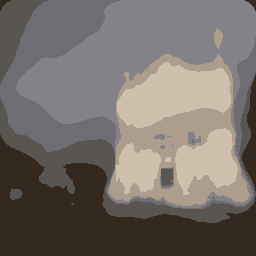

In [30]:
img

In [34]:
transforms.ToTensor()(img_converted)[2].unique()

tensor([0.1216, 0.3137, 0.4510, 0.5294, 0.5529, 0.6784])

# Example

In [ ]:
img = Image.open(
    "../assets/stroke_gen/lsun_church/19e541d2fe62124466c5fa43e44894197839ff66.webp")
img = trans(img)
img.shape

torch.Size([3, 256, 256])

In [12]:
img_med = kornia.filters.median_blur(img.unsqueeze(0), (23, 23))
img_med.shape

torch.Size([1, 3, 256, 256])

In [13]:
img_med

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])

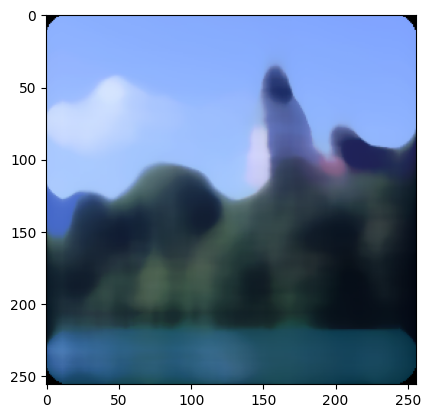

In [14]:
plt.imshow(img_med.squeeze(0).permute(1, 2, 0))

In [18]:
img = transforms.functional.to_pil_image(img_med.squeeze(0))
img.size

(256, 256)

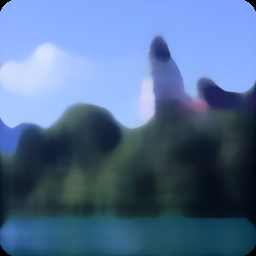

In [19]:
img

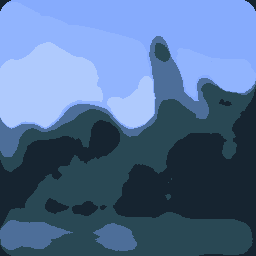

In [20]:
img.convert('P', palette=Image.ADAPTIVE, colors=6)